# Supervised

In [30]:
X = df.drop(['anomaly'], axis=1)
y = df['anomaly']

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[['product_category_name']] = encoder.fit_transform(X[['product_category_name']])

# split X y to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.utils import resample, shuffle

df_train = pd.concat([X_train, y_train], axis=1)
df_train_True = df_train[df_train.anomaly]
df_train_False = df_train[df_train.anomaly==False]

df_train_False = resample(df_train_False, replace=True, n_samples=df_train_True.shape[0])

df_train_balanced = shuffle(pd.concat([df_train_True, df_train_False]))
X_train = df_train_balanced.drop(['anomaly'], axis=1)
y_train = df_train_balanced['anomaly']

### XGBoost

In [31]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

confusion matrix: [[22098  6938]
 [  368  1280]]
accuracy: 0.7618954503976013
precision: 0.1557556583110246
recall: 0.7766990291262136


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

confusion matrix: [[17308 11728]
 [  724   924]]
accuracy: 0.5941858949289532
precision: 0.07303193171040152
recall: 0.5606796116504854


/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

confusion matrix: [[22703  6333]
 [  409  1239]]
accuracy: 0.7802763655325251
precision: 0.16362916006339145
recall: 0.7518203883495146


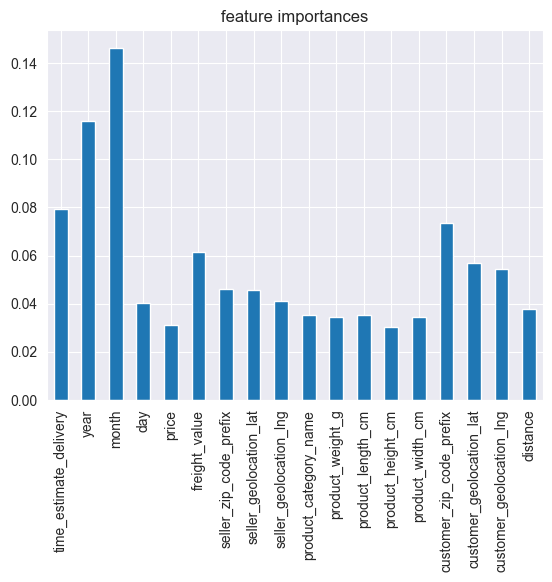

In [34]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(XGB.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

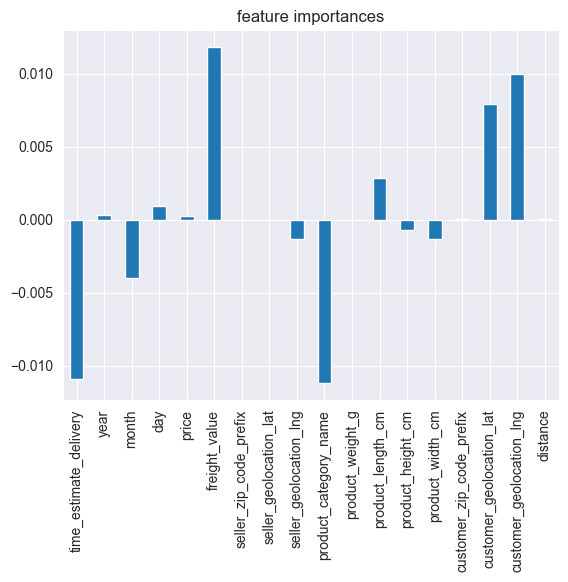

In [35]:
feature_importances = pd.Series(LR.coef_[0], index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

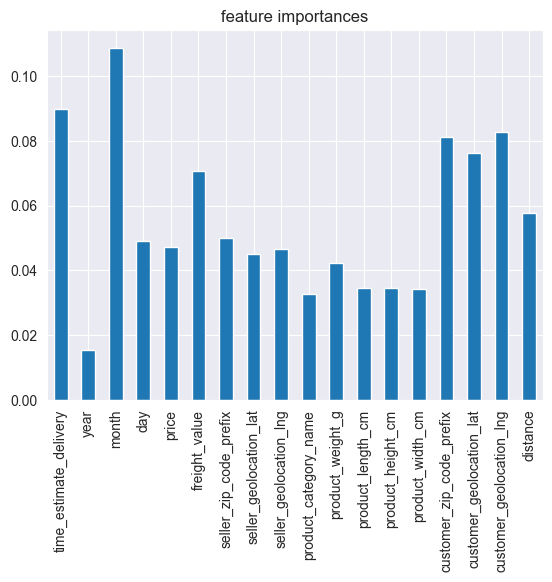

In [36]:
feature_importances = pd.Series(RF.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

In [37]:
print(X.columns)

Index(['time_estimate_delivery', 'year', 'month', 'day', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix', 'customer_geolocation_lat',
       'customer_geolocation_lng', 'distance'],
      dtype='object')


In [38]:
columns1 = ['time_estimate_delivery', 'year', 'month', 'day', 'freight_value', 'seller_zip_code_prefix', 'seller_geolocation_lat', 'seller_geolocation_lng','customer_zip_code_prefix', 'customer_geolocation_lat', 'customer_geolocation_lng', 'distance']

In [39]:
X1_train = X_train[columns1]
X1_test = X_test[columns1]

confusion matrix: [[22462  6574]
 [  385  1263]]
accuracy: 0.7732042758440881
precision: 0.16115860660967207
recall: 0.7663834951456311


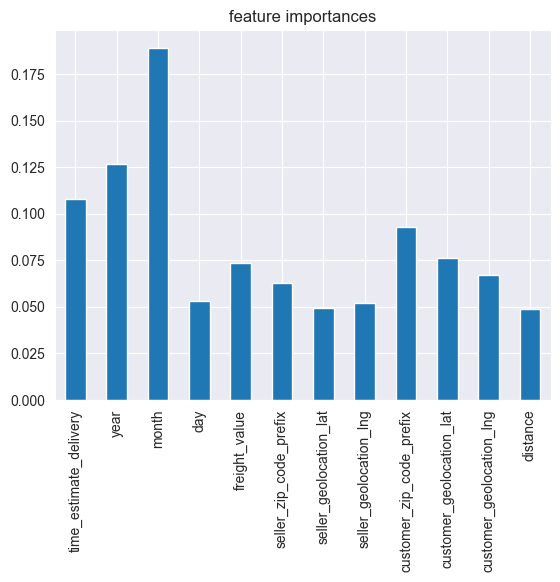

In [40]:
XGB = XGBClassifier()
XGB.fit(X1_train, y_train)
y_predict = XGB.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(XGB.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

confusion matrix: [[18844 10192]
 [  626  1022]]
accuracy: 0.647438404380133
precision: 0.09113607990012484
recall: 0.6201456310679612


/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


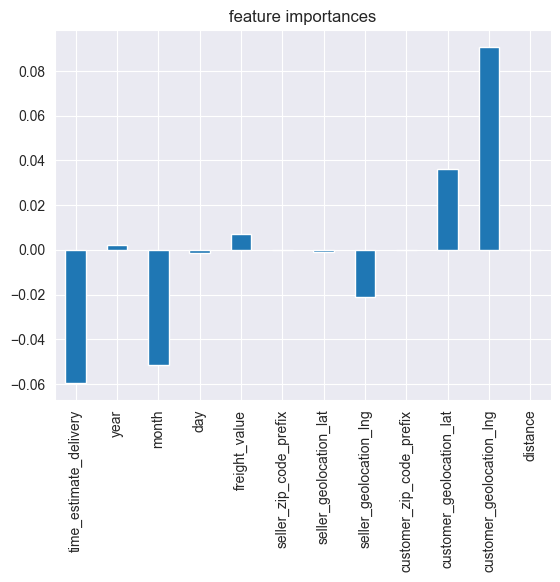

In [41]:
LR = LogisticRegression()
LR.fit(X1_train, y_train)
y_predict = LR.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(LR.coef_[0], index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

confusion matrix: [[22966  6070]
 [  425  1223]]
accuracy: 0.7883261634728197
precision: 0.16769505004799123
recall: 0.7421116504854369


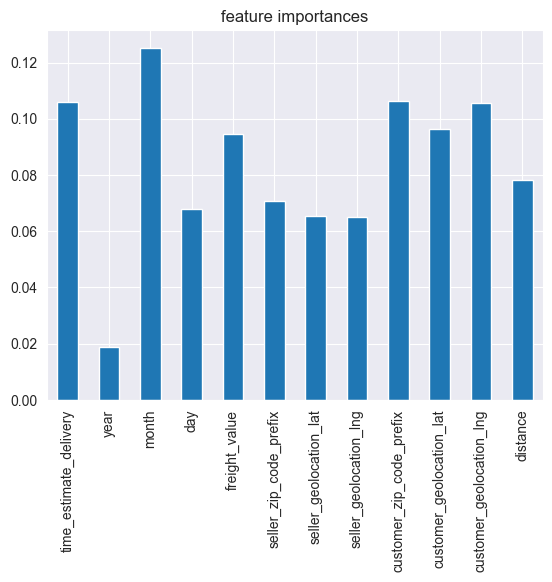

In [42]:
RF = RandomForestClassifier()
RF.fit(X1_train, y_train)
y_predict = RF.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(RF.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

By analyzing feature importances and trying, I find the features which are important

• time_estimate_delivery
• distance
• freight_value

• year
• month
• day

• seller_zip_code_prefix
• seller_geolocation_lat
• seller_geolocation_lng
• customer_zip_code_prefix
• customer_geolocation_lat
• customer_geolocation_lng

The low precision value is because the test dataset is imbalanced while the train dataset is balanced by me. However, if not using balanced dataset, the recall rate is low. I think recall is more important than precision.